<h1><center><font color=darkcyan>  TP d'Apprentissage statistiques sur les données biologiques </font></center></h1>

<h2><center><font color=darkorange> Application à la régression linéaire et régression LASSO</font></center></h2>

<lu>
    <li><font color=darkblue> SOPGOUI MBEUKAM Lionel</font></li>
    <li><font color=darkblue> ADDASSI Youssef</font></li>
</lu>
<hr>

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection

### Question 1 : Importation et préparation des données

In [36]:
dataOrg = pd.read_csv('GSE17924_series_matrix.txt',sep='\t',index_col=0, skiprows=21)
dataOrg = dataOrg.transpose()
dataOrg.head()

,12,13,14,15,16,17,18,19,20,21,...,45200,45201,45202,45203,45204,45205,45206,45207,45208,45209
GSM447781,11.519934,6.915259,9.818105,5.371255,11.843452,4.810572,7.450713,14.397061,5.763549,4.984783,...,5.252327,10.047690,8.234652,13.762584,4.728840,6.430334,9.537699,2.745445,2.735733,9.696610
GSM447782,10.266369,6.584705,10.149880,5.462203,11.636645,4.863805,7.495921,14.840463,5.832707,5.497416,...,5.202092,10.436165,7.862535,13.666809,4.914479,8.071005,10.409059,3.043695,2.825944,9.847350
GSM447783,11.517425,6.336898,9.712470,5.873331,11.452921,3.893979,7.288172,14.405493,6.228280,4.320078,...,6.325055,9.824410,8.270700,13.628572,5.813508,7.943193,9.742599,5.692912,5.057673,9.879107
GSM447784,11.963806,5.881100,9.836638,4.544681,12.135660,5.605158,7.279210,15.060383,5.757566,4.385994,...,4.642562,10.524205,9.303061,13.481760,4.608364,6.823640,10.768028,2.447080,2.593118,10.984354
GSM447785,11.982629,5.990039,9.955628,5.387667,12.134418,3.444473,7.434909,14.590845,5.887564,3.263066,...,5.760451,9.898232,9.130494,12.996577,6.137035,6.583159,10.457579,5.914624,4.437827,10.085594


In [38]:
annotations = pd.read_csv('GPL4133-12599.txt',sep='\t',index_col=0, skiprows=22)
annotations = annotations["GENE_NAME"]
annotations.dropna(inplace=True)

In [39]:
label = pd.read_csv('GSE17924_series_matrix.txt',sep='\t',index_col=0)
label = label.transpose()
label = label["severity"]

C:\Users\maixe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
label = label.replace("severity: DF", 0)
label = label.replace("severity: DHF", 1)
label = label.replace("severity: DSS", 2)
label = pd.DataFrame(label)

## Question 2-a : Calcul et visualisation de la moyenne et de la variance, puis réduction des données

In [41]:
dataOrg.loc['mean',:] = dataOrg.mean()

In [42]:
dataOrg.loc['var',:] = dataOrg.var()

In [43]:
dataOrg.tail(2)

,12,13,14,15,16,17,18,19,20,21,...,45200,45201,45202,45203,45204,45205,45206,45207,45208,45209
mean,12.013254,6.703419,10.172463,5.398674,12.050283,4.689184,7.279115,14.525322,5.783658,4.320613,...,5.470776,10.049973,8.439548,13.697780,5.674765,7.571860,10.124952,3.041932,3.025938,9.571172
var,0.469531,0.204521,0.135950,0.263657,0.224504,1.013781,0.062560,0.468381,0.766119,0.979006,...,0.215697,0.355891,0.156759,0.195122,0.651021,0.372346,0.477476,0.750174,0.615580,0.534234


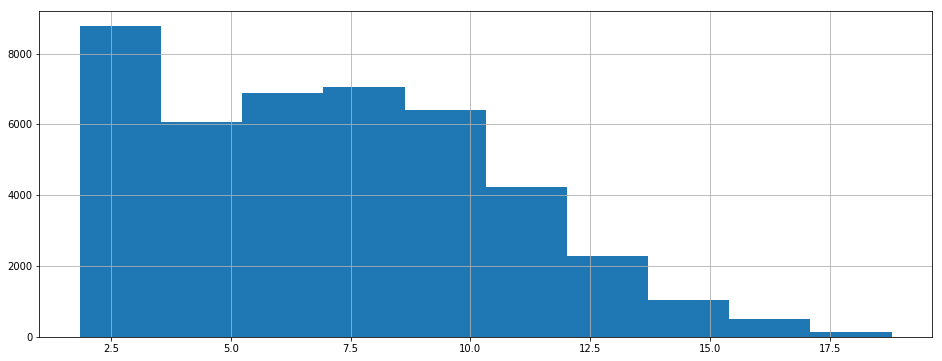

In [44]:
plt.figure(figsize=(16,6))
dataOrg.loc['mean',:].hist()
plt.show()

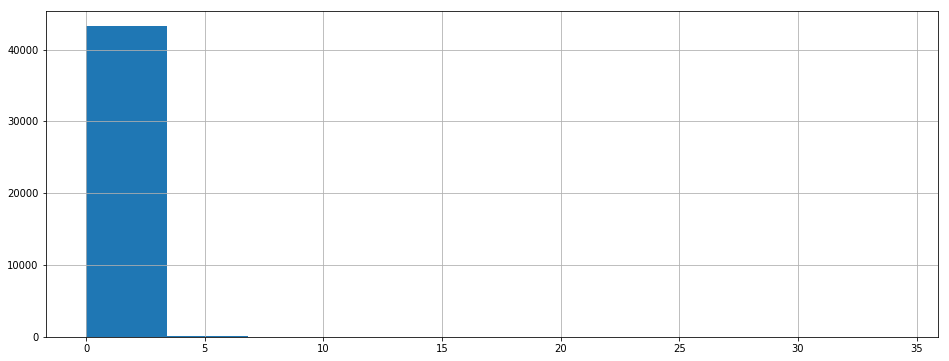

In [45]:
plt.figure(figsize=(16,6))
dataOrg.loc['var',:].hist()
plt.show()

In [46]:
S = dataOrg.loc['mean',:]>3

In [47]:
T = dataOrg.loc['var',:]>2

In [48]:
dataOrg = dataOrg.loc[:,S]
dataOrg = dataOrg.loc[:,T]

## Question 2-b : Réduction de la dimensionalité par application de l'ACP.

In [49]:
pca = PCA(n_components=2)
pca_ = pca.fit_transform(dataOrg[:48])
pca__ = pd.DataFrame(data = pca_, columns = ['pca 1', 'pca 2'])

In [50]:
pca__.head()

,pca 1,pca 2
0,44.023905,-17.182972
1,-3.549790,-2.321428
2,9.048354,4.176797
3,3.400135,-22.253105
4,21.364860,15.981512


In [51]:
finalDf = pca__.insert(2, "severity", label["severity"].values)

In [52]:
pca__.head()

,pca 1,pca 2,severity
0,44.023905,-17.182972,0
1,-3.549790,-2.321428,0
2,9.048354,4.176797,2
3,3.400135,-22.253105,2
4,21.364860,15.981512,1


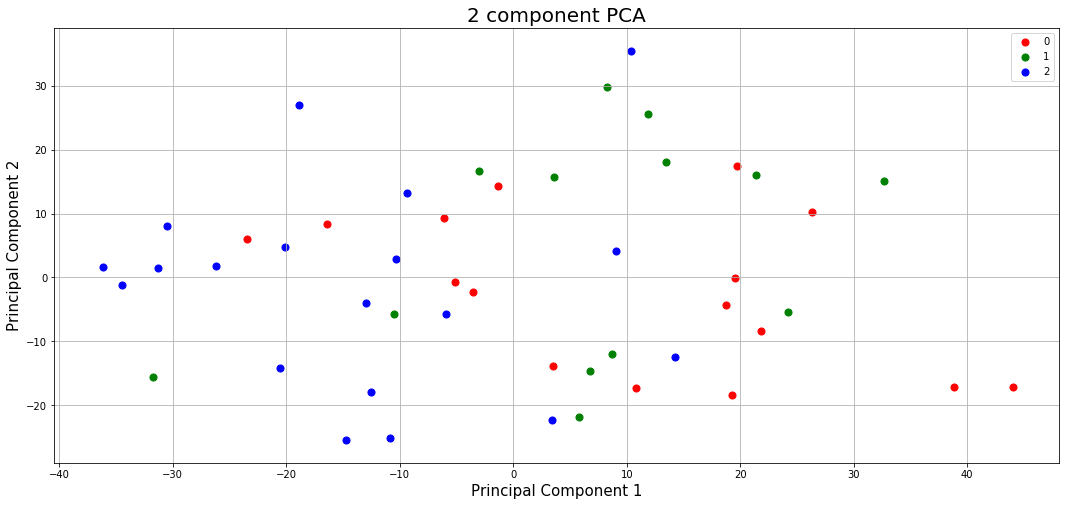

In [53]:
fig = plt.figure(figsize = (18,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca__['severity'] == target
    ax.scatter(pca__.loc[indicesToKeep, 'pca 1']
               , pca__.loc[indicesToKeep, 'pca 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


### Oui, il y a un problème avec les données, la visualisation semble montrer qu'elles ne sont pas séparables (mais on ne peut conclure car c'est juste une ACP en 2D)

In [54]:
import sklearn.linear_model as lm

In [55]:
y = label["severity"]
X = dataOrg[:48]

## Question 3-a : APplication de la régression linéaire

In [61]:
reg = lm.LinearRegression().fit(X, y)

In [62]:
coef_lm = reg.coef_
print("coefficient le plus grand  = ",np.max(coef_lm))
print("coefficient le plus petit = ", np.min(coef_lm))
print("Il y a  0 coefficient non nul (voir plus bas).")

coefficient le plus grand  =  0.02802697327050885
coefficient le plus petit =  -0.025834513228255054
Il y a  0 coefficient non nul (voir plus bas).


In [63]:
dataOrg.loc['lineaire',:] = coef_lm

## Question 3-b : Les coeefficients sont estimés par la formule $\hat{\beta} = (X'X)^{-1} X'y$

## Question 4-a : Application de la régression LASSO

In [64]:
clf = lm.Lasso(alpha=0.1)
clf.fit(X[:48], y)
coef_lasso = clf.coef_

In [65]:
coef_lasso = clf.coef_
print("coefficient le plus grand = ",np.max(coef_lasso))
print("coefficient le plus petit = ", np.min(coef_lasso))
print("Il y a  554 coefficients non nuls (voir plus bas).")

coefficient le plus grand =  0.14960596994448327
coefficient le plus petit =  -0.05126785774067178
Il y a  554 coefficients non nuls (voir plus bas).


## Question 4-b : $\beta$ est estimé en minimisant la fonction $f(\beta) =  \frac{1}{N} ||y - X\beta||_{2}^{2} +  \lambda ||\beta||$

In [69]:
dataOrg.loc['lasso',:] = coef_lasso

In [67]:
dataOrg.loc['keep_linaire',:] = coef_lm != 0
dataOrg.loc['keep_lasso',:] = coef_lasso != 0

In [68]:
dataOrg.tail(6)

,67,386,519,625,713,954,981,1083,1329,1342,...,43909,44005,44045,44074,44171,44189,44335,44840,45034,45160
mean,10.9029,10.6313,4.78008,5.30564,5.72002,8.61532,10.3591,4.079,10.8683,5.02081,...,3.84008,9.73186,9.20546,6.24267,3.80933,10.3298,5.9319,5.84243,6.0309,10.3296
var,2.75172,4.56771,3.66126,2.21715,2.50291,3.34969,2.07047,2.08072,3.29757,2.4392,...,2.11578,4.5536,2.03172,5.59771,2.7067,3.01824,3.42099,2.12792,3.05752,4.45313
lineaire,0.000820431,0.0121374,-0.00476956,-0.00281308,0.0059501,-0.00122705,0.00436745,0.00725851,-0.00139172,7.34357e-06,...,-0.00151829,0.00980771,-0.00324773,0.00552183,0.00498674,-8.16337e-05,-0.00125689,0.0028029,-0.00148142,0.00208021
lasso,0,0.034825,-0,0,0,-0,0,0,-0,-0,...,0,0,-0,0,0,0,-0,-0,-0,0
keep_linaire,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
keep_lasso,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
(dataOrg.loc[:,dataOrg.loc['keep_linaire',:]]).shape

(54, 583)

In [71]:
(dataOrg.loc[:,dataOrg.loc['keep_lasso',:]]).shape

(54, 29)

## Question 5 : Annotation des gènes restants (pour la LASSO)

In [73]:
S = annotations#.iloc[:,1]
dataOrg.rename(S,axis=1,inplace=True)
dataOrg.loc[:,dataOrg.loc['keep_lasso',:]].columns.values

array(['lactotransferrin', 'butyrophilin-like 3',
       'chromosome 7 open reading frame 16',
       'apolipoprotein B mRNA editing enzyme, catalytic polypeptide-like 3A',
       'EF-hand calcium binding domain 3',
       'Rho guanine nucleotide exchange factor (GEF) 10',
       'V-set and immunoglobulin domain containing 4',
       'hemoglobin, gamma A', 'ribosomal protein S4, Y-linked 2', 11366,
       13340, 'myomesin (M-protein) 2, 165kDa',
       'secreted phosphoprotein 1',
       'tetratricopeptide repeat, ankyrin repeat and coiled-coil containing 1',
       'leucine-rich repeats and transmembrane domains 2',
       'tripartite motif-containing 9', 18780,
       'serpin peptidase inhibitor, clade B (ovalbumin), member 10',
       'potassium voltage-gated channel, Shal-related subfamily, member 1',
       'keratin 1',
       'membrane-spanning 4-domains, subfamily A, member 3 (hematopoietic cell-specific)',
       25974, 26691, 'kazrin', 'chromosome 1 open reading frame 173',
  

## Question 6 : estimez la performance prédictive de ces combinaisons linéaires de transcrits avec la validation croisée. 

In [34]:
from sklearn.model_selection import cross_val_score
scores_la = cross_val_score(clf, dataOrg[:48], label["severity"], cv=10)
scores_lm = cross_val_score(reg, dataOrg[:48], label["severity"], cv=10)

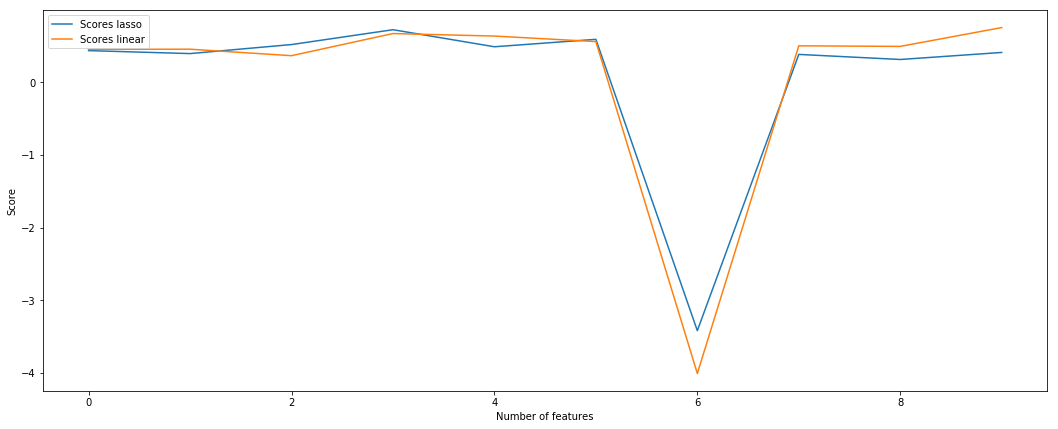

In [35]:
plt.figure(1, figsize=(18,7))
plt.plot(scores_la, label="Scores lasso")
plt.plot(scores_lm, label="Scores linear")
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.legend()

## Question 7 : La validation croisée ne peut pas nous permettre de conclure ici. On voit que les deux courbes sont pratiquement confondues. Elle n'est donc pas assez robuste ici.

<h2><center><font color=darkorange> Fin du TP </font></center></h2>